# Importing libraries

# Python Libraries Description

## Overview
This markdown describes Python libraries commonly used in Jupyter Notebooks for data analysis, visualization, and machine learning.

## Library Descriptions
- **numpy**: Handles numerical computations with arrays and matrices.
- **pandas**: Manages and analyzes data using DataFrames.
- **matplotlib.pyplot**: Generates plots and visualizations.
- **seaborn**: Creates enhanced statistical visualizations.
- **tensorflow**: Supports building and training machine learning models.

## Purpose
These libraries enable efficient data processing, visualization, and machine learning model development in Jupyter Notebooks, using standard aliases for concise coding.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


# Loading Data in Jupyter Notebook

## Overview
This Python code loads three CSV files into pandas DataFrames for data analysis in a Jupyter Notebook.

## Code Description
- **`hotels = pd.read_csv("C:/Users/abdel/ACL/archive/hotels.csv")`**: Loads hotel data from a CSV file into a DataFrame named `hotels`.
- **`reviews = pd.read_csv("C:/Users/abdel/ACL/archive/reviews.csv")`**: Loads review data from a CSV file into a DataFrame named `reviews`.
- **`users = pd.read_csv("C:/Users/abdel/ACL/archive/users.csv")`**: Loads user data from a CSV file into a DataFrame named `users`.

## Purpose
This code imports datasets into pandas DataFrames for further analysis, manipulation, or visualization in a Jupyter Notebook, assuming the files exist at the specified file paths.

In [2]:
hotels=pd.read_csv("C:/Users/abdel/ACL/archive/hotels.csv")
reviews=pd.read_csv("C:/Users/abdel/ACL/archive/reviews.csv")
users=pd.read_csv("C:/Users/abdel/ACL/archive/users.csv")

### 🔍 Data Quality Check

This cell checks for duplicates and missing values in the **Hotels**, **Reviews**, and **Users** datasets using `duplicated()` and `isnull().sum()`.  
It was found that there are **no duplicate records** and **no missing values** in any of the datasets.


In [3]:
print(f"Hotels duplicates: {hotels.duplicated().sum()}")
print(f"Reviews duplicates: {reviews.duplicated().sum()}")
print(f"Users duplicates: {users.duplicated().sum()}")
print("--------------------------------")
print(f"Hotels nuls: {hotels.isnull().sum()}")
print("--------------------------------")
print(f"Reviews nuls: {reviews.isnull().sum()}")
print("--------------------------------")
print(f"Users nuls: {users.isnull().sum()}")

Hotels duplicates: 0
Reviews duplicates: 0
Users duplicates: 0
--------------------------------
Hotels nuls: hotel_id                0
hotel_name              0
city                    0
country                 0
star_rating             0
lat                     0
lon                     0
cleanliness_base        0
comfort_base            0
facilities_base         0
location_base           0
staff_base              0
value_for_money_base    0
dtype: int64
--------------------------------
Reviews nuls: review_id                0
user_id                  0
hotel_id                 0
review_date              0
score_overall            0
score_cleanliness        0
score_comfort            0
score_facilities         0
score_location           0
score_staff              0
score_value_for_money    0
review_text              0
dtype: int64
--------------------------------
Users nuls: user_id           0
user_gender       0
country           0
age_group         0
traveller_type    0
join_date  

### 🧾 Dataset Overview

This cell displays the structure and summary information of the **Reviews**, **Hotels**, and **Users** datasets using `info()`.  
It shows the number of entries, column names, data types, and confirms that there are **no missing values** in any dataset.


In [4]:
reviews.info()
print("--------------------------------")   
hotels.info()
print("--------------------------------")
users.info()
print("--------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   review_id              50000 non-null  int64  
 1   user_id                50000 non-null  int64  
 2   hotel_id               50000 non-null  int64  
 3   review_date            50000 non-null  object 
 4   score_overall          50000 non-null  float64
 5   score_cleanliness      50000 non-null  float64
 6   score_comfort          50000 non-null  float64
 7   score_facilities       50000 non-null  float64
 8   score_location         50000 non-null  float64
 9   score_staff            50000 non-null  float64
 10  score_value_for_money  50000 non-null  float64
 11  review_text            50000 non-null  object 
dtypes: float64(7), int64(3), object(2)
memory usage: 4.6+ MB
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 2

This code merges the reviews, hotels, and users datasets into one DataFrame (df) by performing left joins on the hotel_id and user_id columns to combine review, hotel, and user information.

# Merging DataFrames

## Overview
Merges pandas DataFrames (`reviews`, `hotels`, `users`) for analysis in Jupyter Notebook.

## Description
- **`review_hotel_df = reviews.merge(hotels, on='hotel_id', how='left')`**: Merges `reviews` with `hotels` on `hotel_id` using left join.
- **`df = review_hotel_df.merge(users, on='user_id', how='left')`**: Merges `review_hotel_df` with `users` on `user_id` using left join.

## Purpose
Combines review, hotel, and user data into one DataFrame for integrated analysis.

In [5]:
review_hotel_df=reviews.merge(hotels,on='hotel_id',how='left')
df=review_hotel_df.merge(users,on='user_id',how='left')

# Renaming Columns

## Overview
Renames columns in a pandas DataFrame for clarity in Jupyter Notebook.

## Description
- **`df.rename(columns={"country_x":"hotel_country","country_y":"user_country"}, inplace=True)`**: Renames `country_x` to `hotel_country` and `country_y` to `user_country` in `df` directly.

## Purpose
Improves readability by clarifying column names in the merged dataset.

In [6]:
df.rename(columns={"country_x":"hotel_country","country_y":"user_country"},inplace=True)

# Country Grouping in DataFrame

## Overview
Assigns country groups to users based on their country and displays selected columns.

## Description
- **`groups = {...}`**: Defines a dictionary mapping regions to lists of countries (e.g., North_America: United States, Canada).
- **`df["country_group"] = df["user_country"].apply(...)`**: Creates a `country_group` column by mapping `user_country` to a region from `groups`, defaulting to "Other" if not found.
- **`df[["hotel_country","user_country","country_group"]]`**: Selects `hotel_country`, `user_country`, and `country_group` columns for display.

## Purpose
Categorizes users by geographic region and shows relevant country data to fill country_group column.

In [7]:
groups={'North_America':['United States','Canada'],
        'Western_Europe':['Germany','France','United Kingdom','Netherlands','Spain','Italy'],
        'Eastern_Europe':['Russia'],
        'East_Asia':['China','Japan','South Korea'],
        'Southeast_Asia':['Thailand','Singapore'],
        'Middle_East':['United Arab Emirates','Turkey'],
        'Africa':['Egypt','Nigeria','South Africa'],
        'Oceania':['Australia','New Zealand'],
        'South_America':['Brazil','Argentina'],
        'South_Asia':['India'],
        'North_America_Mexico':['Mexico']}

df["country_group"]=df["user_country"].apply(lambda x: next((key for key, value in groups.items() if x in value), "Other"))

df[["hotel_country","user_country","country_group"]]

,hotel_country,user_country,country_group
0,United States,New Zealand,Oceania
1,Japan,United Kingdom,Western_Europe
2,Egypt,Spain,Western_Europe
3,Spain,United Kingdom,Western_Europe
4,Russia,Australia,Oceania
...,...,...,...
49995,Nigeria,Mexico,North_America_Mexico
49996,Brazil,New Zealand,Oceania
49997,Singapore,Russia,Eastern_Europe
49998,Turkey,United Kingdom,Western_Europe


# Data-Engineering Question 1 

## Overview
Calculates the best city for each traveller type based on reviews.

## Description
- **`city_scores = df.groupby(['traveller_type', 'city'])['score_overall'].mean().reset_index().sort_values(...)`**: Groups data by `traveller_type` and `city`, computes mean `score_overall`, resets index, and sorts by `traveller_type` (ascending) and `score_overall` (descending).
- **`best_cities = city_scores.groupby('traveller_type').head(1)`**: Selects the top city (highest score) for each `traveller_type`.


In [8]:
city_scores = df.groupby(['traveller_type', 'city'])['score_overall'].mean().reset_index().sort_values(['traveller_type', 'score_overall'], ascending=[True,False])

best_cities = city_scores.groupby('traveller_type').head(1)

# display(city_scores)


C:\Users\abdel\AppData\Local\Temp\ipykernel_26412\530573463.py:35: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\abdel\fire_env_tf\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


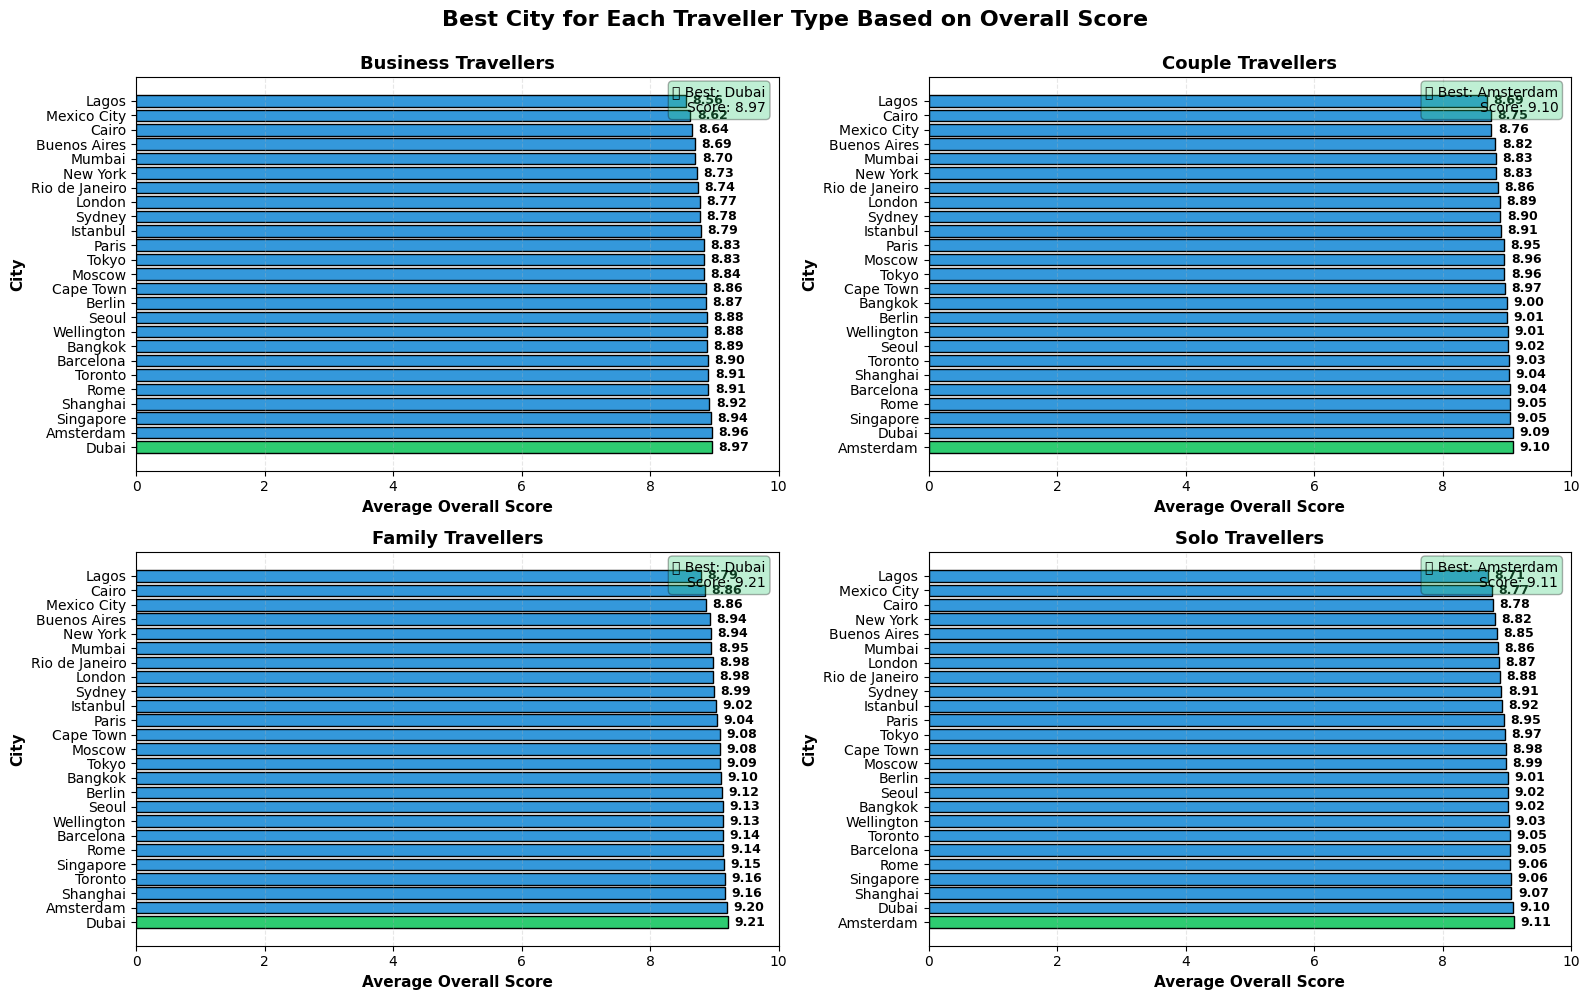

In [10]:

# OPTION 1: Grouped Bar Chart (One subplot per traveller type) - RECOMMENDED
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

traveller_types = city_scores['traveller_type'].unique()

for idx, traveller in enumerate(traveller_types):
    # Filter data for this traveller type
    data = city_scores[city_scores['traveller_type'] == traveller]
    best_city = best_cities[best_cities['traveller_type'] == traveller]['city'].values[0]
    
    # Create colors (highlight best city in green)
    colors = ['#2ECC71' if city == best_city else '#3498DB' for city in data['city']]
    
    # Plot horizontal bar chart
    axes[idx].barh(data['city'], data['score_overall'], color=colors, edgecolor='black', linewidth=1)
    axes[idx].set_xlabel('Average Overall Score', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('City', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{traveller} Travellers', fontsize=13, fontweight='bold')
    axes[idx].set_xlim(0, 10)
    axes[idx].grid(axis='x', alpha=0.3, linestyle='--')
    
    # Add score labels on bars
    for i, (city, score) in enumerate(zip(data['city'], data['score_overall'])):
        axes[idx].text(score + 0.1, i, f'{score:.2f}', va='center', fontsize=9, fontweight='bold')
    
    # Add best city annotation
    best_score = best_cities[best_cities['traveller_type'] == traveller]['score_overall'].values[0]
    axes[idx].text(0.98, 0.98, f'🏆 Best: {best_city}\nScore: {best_score:.2f}',
                  transform=axes[idx].transAxes, fontsize=10, ha='right', va='top',
                  bbox=dict(boxstyle='round', facecolor='#2ECC71', alpha=0.3, edgecolor='black'))

plt.suptitle('Best City for Each Traveller Type Based on Overall Score', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

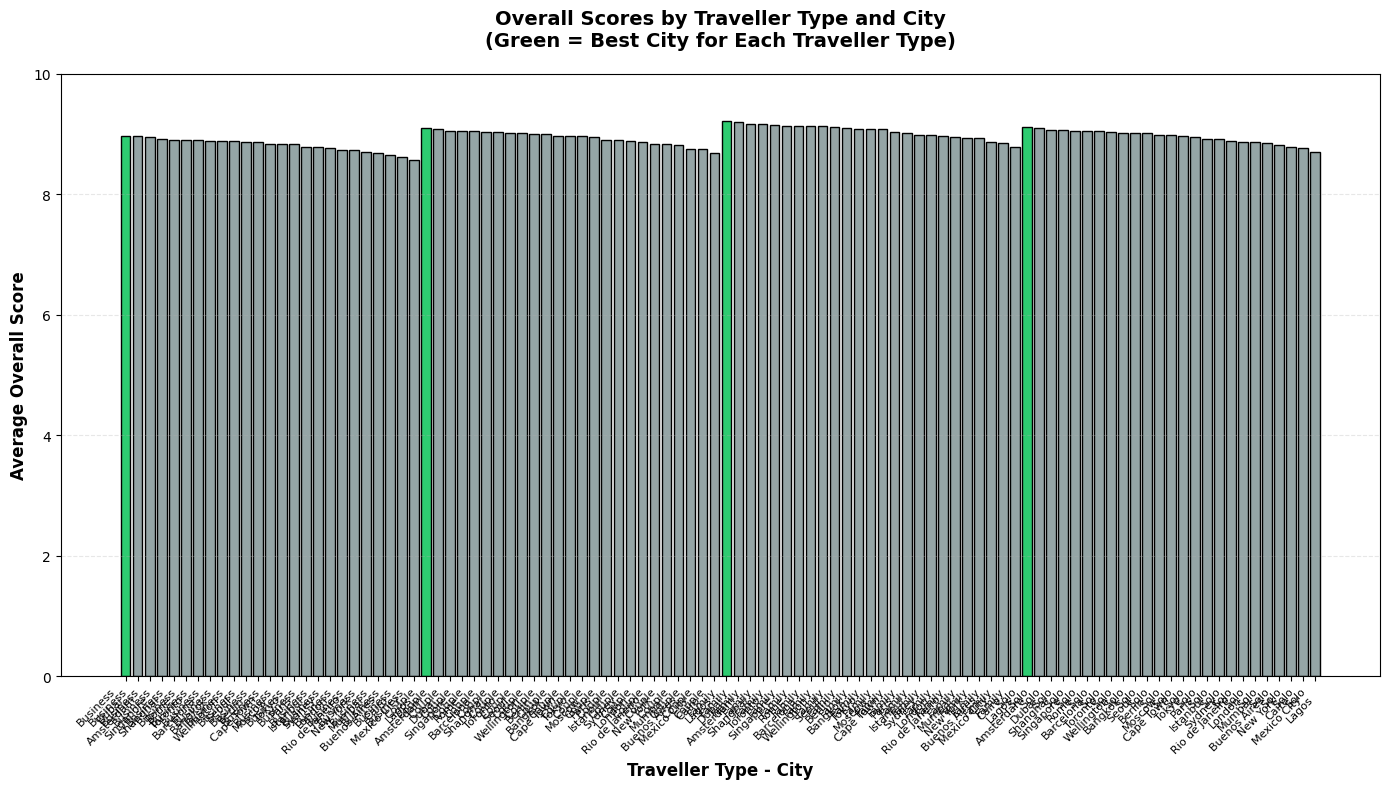

In [11]:
plt.figure(figsize=(14, 8))

# Create position for bars
traveller_list = []
city_list = []
score_list = []
color_list = []

for traveller in traveller_types:
    data = city_scores[city_scores['traveller_type'] == traveller]
    best_city = best_cities[best_cities['traveller_type'] == traveller]['city'].values[0]
    
    for _, row in data.iterrows():
        traveller_list.append(traveller)
        city_list.append(row['city'])
        score_list.append(row['score_overall'])
        color_list.append('#2ECC71' if row['city'] == best_city else '#95A5A6')

# Create grouped bar chart
x_labels = [f"{t}\n{c}" for t, c in zip(traveller_list, city_list)]
x_pos = range(len(x_labels))

plt.bar(x_pos, score_list, color=color_list, edgecolor='black', linewidth=1)
plt.xlabel('Traveller Type - City', fontsize=12, fontweight='bold')
plt.ylabel('Average Overall Score', fontsize=12, fontweight='bold')
plt.title('Overall Scores by Traveller Type and City\n(Green = Best City for Each Traveller Type)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(x_pos, x_labels, rotation=45, ha='right', fontsize=8)
plt.ylim(0, 10)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


# The Plot of question 1
 ### 📊 Best City per Traveller Type

This bar chart compares the **average overall score** for different traveller types, highlighting the **best-rated city** for each group.  
Each bar represents a traveller type, labeled with the city that received the highest score and its exact value.  
The plot shows how preferences differ among traveller types based on their overall ratings.


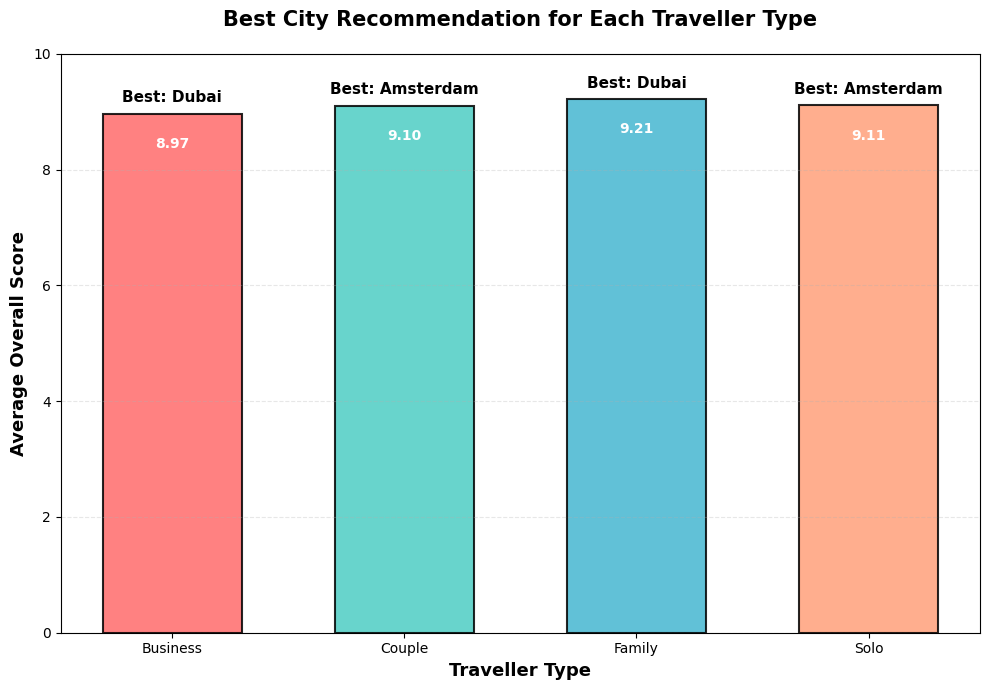

In [45]:
plt.figure(figsize=(10, 7))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

bars = plt.bar(best_cities['traveller_type'], 
               best_cities['score_overall'], 
               color=colors, 
               edgecolor='black', 
               linewidth=1.5, 
               alpha=0.85,
               width=0.6)

plt.xlabel('Traveller Type', fontsize=13, fontweight='bold')
plt.ylabel('Average Overall Score', fontsize=13, fontweight='bold')
plt.title('Best City Recommendation for Each Traveller Type', 
          fontsize=15, fontweight='bold', pad=20)
plt.ylim(0, 10)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add city names and scores on top of each bar (replace 🏆 with text)
for i, (traveller, city, score) in enumerate(zip(best_cities['traveller_type'], 
                                                   best_cities['city'], 
                                                   best_cities['score_overall'])):
    plt.text(i, score + 0.15, f'Best: {city}', 
             ha='center', va='bottom', fontsize=11, fontweight='bold')
    plt.text(i, score - 0.4, f'{score:.2f}', 
             ha='center', va='top', fontsize=10, fontweight='bold', color='white')

# plt.xticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()



# Question 2

### 🌍 Top Countries by Value-for-Money Score

This code calculates the **average value-for-money score** for each country within every **age group**.  
It then sorts the results and extracts the **top 3 countries** per age group with the highest average scores.


In [13]:
top_countries=df.groupby(['age_group','user_country'])['score_value_for_money'].mean().reset_index().sort_values(['age_group','score_value_for_money'],ascending=[True,False])
top3=top_countries.groupby('age_group').head(3)
display(top3)

,age_group,user_country,score_value_for_money
5,18-24,Egypt,9.007317
19,18-24,Spain,8.768132
0,18-24,Argentina,8.689000
44,25-34,Spain,8.733259
43,25-34,South Korea,8.632800
37,25-34,Netherlands,8.542157
66,35-44,Singapore,8.795385
50,35-44,Argentina,8.696519
63,35-44,New Zealand,8.641079
94,45-54,Turkey,8.641778


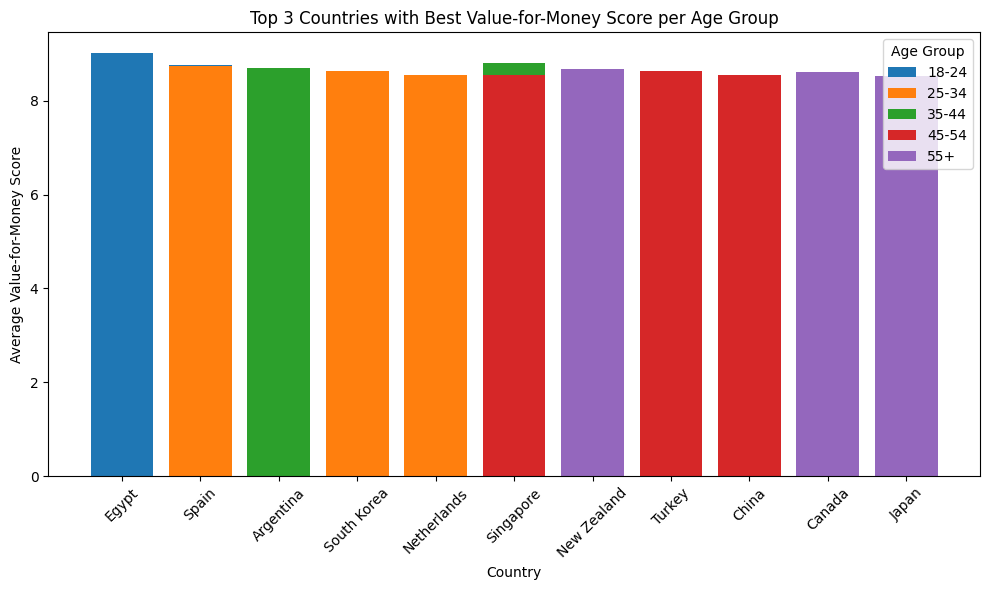

In [14]:
plt.figure(figsize=(10,6))
for age, group in top3.groupby('age_group'):
    plt.bar(group['user_country'], group['score_value_for_money'], label=age)

plt.title('Top 3 Countries with Best Value-for-Money Score per Age Group')
plt.xlabel('Country')
plt.ylabel('Average Value-for-Money Score')
plt.legend(title='Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


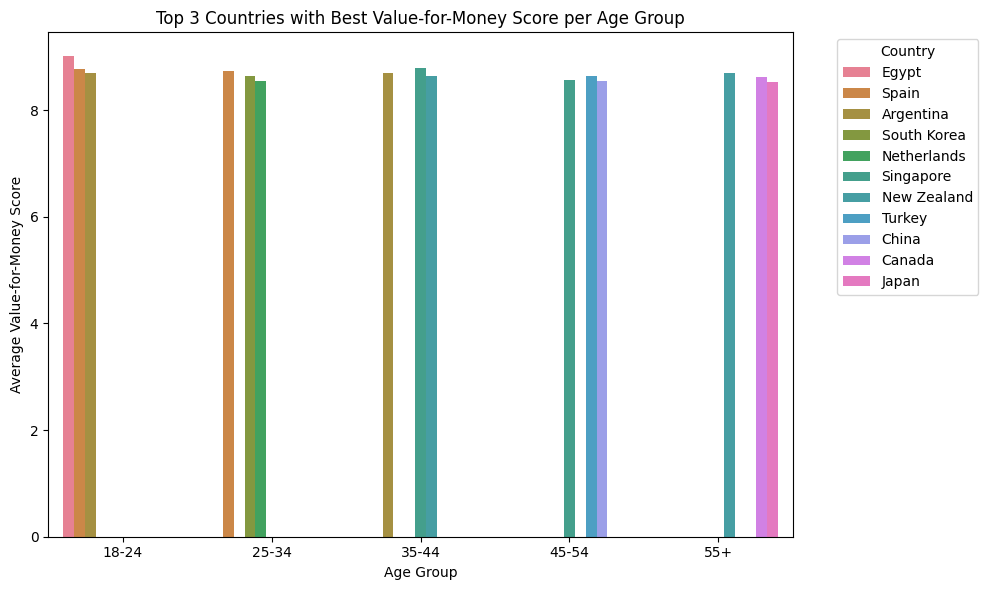

<Axes: xlabel='age_group', ylabel='score_value_for_money'>

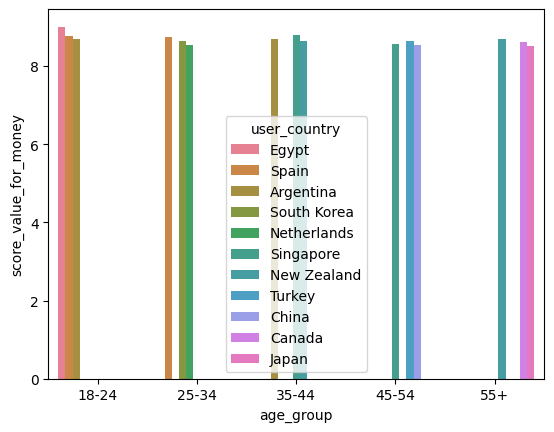

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top3,
    x='age_group',  # 👈 now on the bottom
    y='score_value_for_money',
    hue='user_country'  # different colors for each country
)

plt.title('Top 3 Countries with Best Value-for-Money Score per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Value-for-Money Score')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
order = ['18-24', '25-34', '35-44', '45-54', '55+']
sns.barplot(
    data=top3,
    x='age_group',
    y='score_value_for_money',
    hue='user_country',
    order=order
)


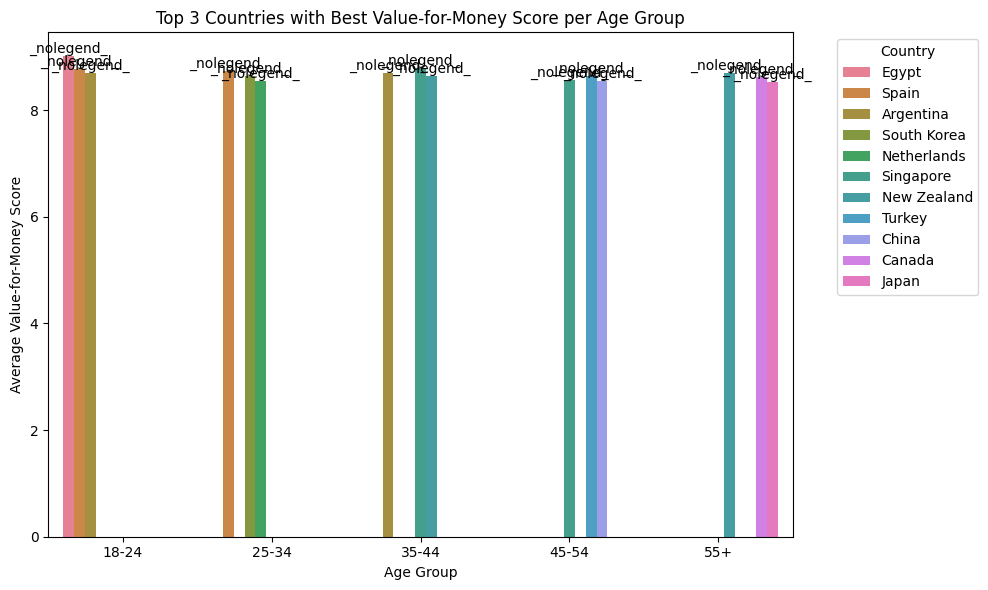

In [16]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=top3,
    x='age_group',
    y='score_value_for_money',
    hue='user_country'
)

# Add country labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%s', labels=[c.get_label() for c in container])

plt.title('Top 3 Countries with Best Value-for-Money Score per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Value-for-Money Score')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

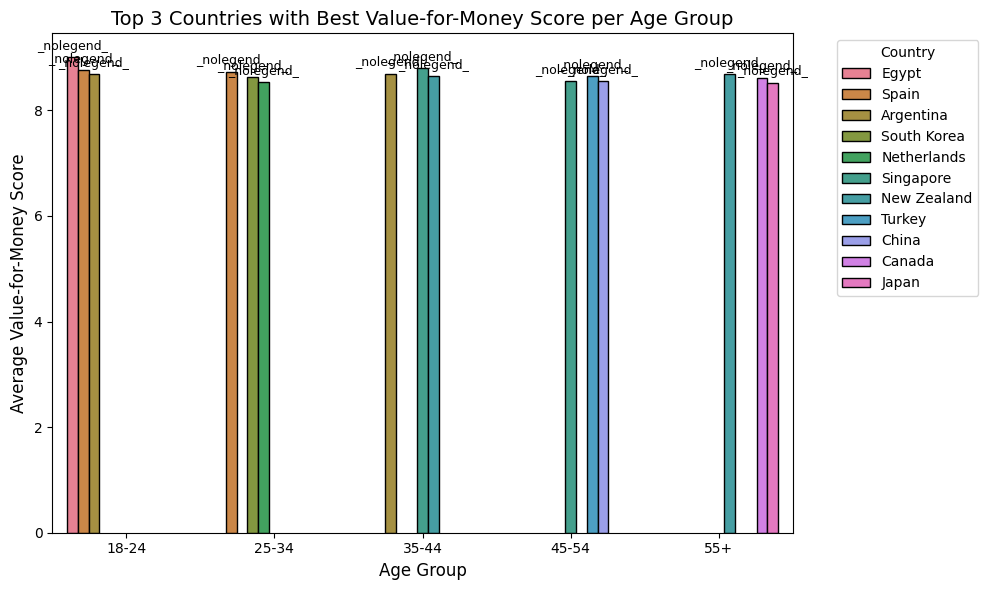

In [17]:
plt.figure(figsize=(10,6))

# Create the barplot with wider bars
ax = sns.barplot(
    data=top3,
    x='age_group',
    y='score_value_for_money',
    hue='user_country',
    dodge=True,         # separate bars per country
    width=0.8,          # wider bars (default = 0.8, you can go up to 0.9)
    edgecolor='black'   # optional: makes edges clearer
)

# Add the country name above each bar
for container in ax.containers:
    # Place label above the bar
    ax.bar_label(container, labels=[bar.get_label() for bar in container],
                 label_type='edge', padding=3, fontsize=9, color='black', rotation=0)

plt.title('Top 3 Countries with Best Value-for-Money Score per Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Value-for-Money Score', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 🧮 Data Encoding and Preparation

This cell prepares the dataset for modeling by:  
- Converting categorical variables (**traveller_type**, **city**, and **user_gender**) into numerical form using one-hot encoding (`get_dummies`).  
- Mapping **age groups** to ordered numeric values for easier analysis or modeling.  
- Dropping the original `age_group` column after encoding.


In [18]:
df = pd.get_dummies(df, columns=['traveller_type'], drop_first=True)
df = pd.get_dummies(df, columns=['city'], drop_first=True)
df = pd.get_dummies(df, columns=['user_gender'], drop_first=True)
age_order = {
    '18-24': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55+': 5
}

df['age'] = df['age_group'].map(age_order)
df.drop(columns=['age_group'], inplace=True)

### 🧹 Feature Selection and Cleanup

This cell removes unnecessary or non-numerical columns (like IDs, text, and location data) that are not needed for analysis or modeling.  
The resulting `final_df` contains only the relevant features for further processing.


In [ ]:

from typing import final


columns_to_drop = [
    'review_id',         
    'user_id',           
    'hotel_id',          
    'review_date',      
    'join_date',          
    'user_country',     
    'review_text',       
    'hotel_name',        
    'hotel_country',      
    'lat',                
    'lon'  
]
final_df=df.drop(columns=columns_to_drop)

# final_df.to_csv('final_dataset.csv', index=False)   
final_df.head()


,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,star_rating,cleanliness_base,comfort_base,...,city_Seoul,city_Shanghai,city_Singapore,city_Sydney,city_Tokyo,city_Toronto,city_Wellington,user_gender_Male,user_gender_Other,age
0,8.7,8.6,8.7,8.5,9.0,8.8,8.7,5,9.1,8.8,...,False,False,False,False,False,False,False,False,False,2
1,9.1,10.0,9.1,9.0,8.6,9.4,8.6,5,9.6,9.0,...,False,False,False,False,True,False,False,False,False,3
2,8.8,9.7,8.8,8.3,8.7,8.1,8.6,5,8.8,8.7,...,False,False,False,False,False,False,False,False,False,5
3,8.9,9.0,8.8,8.5,9.6,9.1,8.3,5,9.2,9.1,...,False,False,False,False,False,False,False,False,False,3
4,9.1,8.9,9.5,9.3,8.3,9.4,8.9,5,9.1,9.3,...,False,False,False,False,False,False,False,True,False,4


# Checking for null values 

after checking the data in the table there was no null values

In [20]:
final_df.isnull().sum()

score_overall            0
score_cleanliness        0
score_comfort            0
score_facilities         0
score_location           0
score_staff              0
score_value_for_money    0
star_rating              0
cleanliness_base         0
comfort_base             0
facilities_base          0
location_base            0
staff_base               0
value_for_money_base     0
country_group            0
traveller_type_Couple    0
traveller_type_Family    0
traveller_type_Solo      0
city_Bangkok             0
city_Barcelona           0
city_Berlin              0
city_Buenos Aires        0
city_Cairo               0
city_Cape Town           0
city_Dubai               0
city_Istanbul            0
city_Lagos               0
city_London              0
city_Mexico City         0
city_Moscow              0
city_Mumbai              0
city_New York            0
city_Paris               0
city_Rio de Janeiro      0
city_Rome                0
city_Seoul               0
city_Shanghai            0
c

In [ ]:
final_df.rename(columns={"age_encoded":"age","ci":"user_country"},inplace=True)

In [22]:
final_df.to_csv('final_dataset.csv', index=False)

final_df is the cleaned dataset 